---------------Tumor-Cell-Analysis-Project-------------------

I will check if there are any missing values. And I will perform any necessary data imputation on the
data set.

Turns out there was one missing value in the column of the second feature which is labeled '10.38'. This value has been replaced with the mean of the column, ensuring that we don't lose data by dropping the row. This should not affect the accuracy too much since the values aren't very wide spread in this column.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/public/bmort/python/tumor_cells.csv')

In [3]:
df

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
1,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
2,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
3,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
4,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,...,15.47,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,922576,B,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.024430,...,15.35,29.09,97.58,729.8,0.1216,0.15170,0.10490,0.07174,0.2642,0.06953
545,922577,B,10.320,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
546,922840,B,10.260,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.024380,...,10.83,22.04,71.08,357.4,0.1461,0.22460,0.17830,0.08333,0.2691,0.09479
547,923169,B,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,...,10.93,25.59,69.10,364.2,0.1199,0.09546,0.09350,0.03846,0.2552,0.07920


In [5]:
df.to_csv('DATAFORTUMORCELLS.csv', index=False)

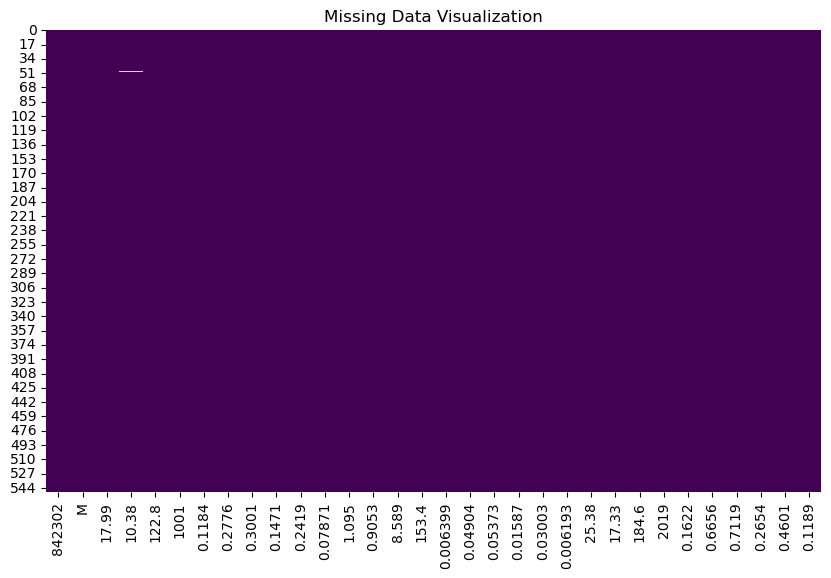

In [6]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()

In [129]:
df['10.38'].isnull().sum()

1

In [130]:
df.isnull().sum()

842302      0
M           0
17.99       0
10.38       1
122.8       0
1001        0
0.1184      0
0.2776      0
0.3001      0
0.1471      0
0.2419      0
0.07871     0
1.095       0
0.9053      0
8.589       0
153.4       0
0.006399    0
0.04904     0
0.05373     0
0.01587     0
0.03003     0
0.006193    0
25.38       0
17.33       0
184.6       0
2019        0
0.1622      0
0.6656      0
0.7119      0
0.2654      0
0.4601      0
0.1189      0
dtype: int64

In [131]:
df['10.38'].fillna(value=df['10.38'].mean(), inplace=True)

In [132]:
df['10.38'].isnull().sum()

0


i ) How do the ranges of the
values in the columns compare? 

answer: 

   It appears the differences between the min and max of the columns are mostly within the 10^(-1) range for the columns, with a few being in 10^0, 10^1 and 10^2 magnitude values.
   However it also appears that the ID column '842302' ranges all the way in the 10^8 magnitude.

ii ) Does each column of data have similar magnitudes
and ranges? Are there any outliers? 

answer: 

   The values are relatively similar in most of the columns, bing small decimals around 0.20. Some feature columns are the low tens, and one feature column '0.1184' which is the 4th feature seems to have values around 10^3, while the column '842302' which is the id column seems to have values around 10^7.
     
   To find outliers, I have found plotted boxplots of each feature to realize that many values are in fact ouliers, however I have decided to only work on removing rows where features are equivalent to many times the mean that I have determined visually to be the following values which are considered extreme outliers:

Feature 2 > 37

Feature 5 > 1e6

Feature 11 > 2.4

Feature 12 > 4.5

Feature 13 > 15

Feature 14 > 500

Feature 15 > 0.03

Feature 17 > 0.28

Feature 18 > 0.05

Feature 19 > 0.07

Feature 20 > 0.015

Feature 24 > 4000

Feature 29 > 0.6

Feature 30 > 0.16
    

    
iii ) I will perform any necessary modifications on the
data set and document your changes and explanations.

   modification 1:
            It appears that the columns labels is actually a row of data, so I will be replacing the labels with the information I know which is the 'ID' column and the 'Diagnosis' column that denotes malignance or benignness, and the rest will be numbered features such as feature 1, feature 2, etc.
    
   modification 2:
            The outliers outlined above came out to the following rows [238,249,211,460,191,212,67,151,77,70,175,289,2,8], which I ended up dropping entirely, losing 14 rows of data.
            The reason I chose to remove these outliers were for the following reasons. First of all, because many of the rows that had extreme outliers are shared between different outliers, so we wouldn't have to remove many rows. And secondly because there weren't many extreme outliers such that a significant part of the data would have to be manipulated, which wouldn't be ideal for machine learning since a large amount of accurate data would be ideal.

In [133]:
labels = df.columns.tolist()
labels
def convert_numeric(data):
    converted_data = []
    for item in data:
        try:
            converted_data.append(int(item))
        except ValueError:
            try:
                converted_data.append(float(item))
            except ValueError:
                converted_data.append(item)
    return converted_data

converted_list = convert_numeric(labels)

In [134]:
df_spare = df

In [135]:
df_spare.loc[549] = converted_list

In [136]:
df_spare.loc[549] # finally we have appended a new row that is the values in the labels
#end of modification 1

842302        842302
M                  M
17.99          17.99
10.38          10.38
122.8          122.8
1001          1001.0
0.1184        0.1184
0.2776        0.2776
0.3001        0.3001
0.1471        0.1471
0.2419        0.2419
0.07871      0.07871
1.095          1.095
0.9053        0.9053
8.589          8.589
153.4          153.4
0.006399    0.006399
0.04904      0.04904
0.05373      0.05373
0.01587      0.01587
0.03003      0.03003
0.006193    0.006193
25.38          25.38
17.33          17.33
184.6          184.6
2019          2019.0
0.1622        0.1622
0.6656        0.6656
0.7119        0.7119
0.2654        0.2654
0.4601        0.4601
0.1189        0.1189
Name: 549, dtype: object

In [137]:
df_spare.columns = ['ID', 'Diagnosis', 'Feature 1', 'Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8','Feature 9','Feature 10','Feature 11','Feature 12','Feature 13','Feature 14','Feature 15','Feature 16','Feature 17','Feature 18','Feature 19','Feature 20','Feature 21','Feature 22','Feature 23','Feature 24','Feature 25','Feature 26','Feature 27','Feature 28','Feature 29','Feature 30']

In [138]:
df_spare.head()

,ID,Diagnosis,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [139]:
range_df = df.describe().loc['max'] - df.describe().loc['min']
print(range_df)

ID            9.113118e+08
Feature 1     2.112900e+01
Feature 2     2.957000e+01
Feature 3     1.447100e+02
Feature 4     2.357500e+03
Feature 5     1.007000e+06
Feature 6     3.260200e-01
Feature 7     4.268000e-01
Feature 8     2.012000e-01
Feature 9     1.873000e-01
Feature 10    4.748000e-02
Feature 11    2.761500e+00
Feature 12    4.524800e+00
Feature 13    2.122300e+01
Feature 14    5.353980e+02
Feature 15    2.941700e-02
Feature 16    1.331480e-01
Feature 17    3.960000e-01
Feature 18    5.279000e-02
Feature 19    7.106800e-02
Feature 20    2.894520e-02
Feature 21    2.811000e+01
Feature 22    3.752000e+01
Feature 23    2.007900e+02
Feature 24    4.068800e+03
Feature 25    1.514300e-01
Feature 26    1.030710e+00
Feature 27    1.252000e+00
Feature 28    2.910000e-01
Feature 29    5.073000e-01
Feature 30    1.524600e-01
dtype: float64


In [140]:
df[['Feature 1', 'Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8','Feature 9','Feature 10','Feature 11','Feature 12','Feature 13','Feature 14','Feature 15']].describe()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14,Feature 15
count,550.000000,550.000000,550.000000,550.000000,5.500000e+02,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,14.140805,19.059209,92.052691,655.540727,1.831005e+03,0.104418,0.088416,0.048941,0.181533,0.062839,0.404212,1.196925,2.854629,40.285796,0.007008
std,3.496656,4.150726,24.087190,350.132761,4.293862e+04,0.052316,0.078490,0.038336,0.027259,0.007118,0.277486,0.532101,2.018917,45.643100,0.003009
min,6.981000,9.710000,43.790000,143.500000,6.251000e-02,0.019380,0.000000,0.000000,0.116700,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713
25%,11.740000,16.070000,75.467500,423.075000,8.663500e-02,0.065525,0.029600,0.020413,0.162250,0.057800,0.231925,0.828050,1.598250,17.852500,0.005139
50%,13.390000,18.690000,86.415000,552.050000,9.595500e-02,0.093125,0.061545,0.033600,0.179850,0.061580,0.325000,1.078500,2.288000,24.650000,0.006302
75%,15.780000,21.540000,104.025000,782.675000,1.054000e-01,0.130475,0.130350,0.073910,0.195700,0.066195,0.478375,1.464250,3.325500,45.132500,0.008079
max,28.110000,39.280000,188.500000,2501.000000,1.007000e+06,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130


In [141]:
df[['Feature 16','Feature 17','Feature 18','Feature 19','Feature 20','Feature 21','Feature 22','Feature 23','Feature 24','Feature 25','Feature 26','Feature 27','Feature 28','Feature 29','Feature 30']].describe()

,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,0.025423,0.031751,0.011794,0.020499,0.003790,16.297451,25.439691,107.405582,882.948364,0.132768,0.254555,0.271628,0.115063,0.291221,0.084052
std,0.018007,0.030296,0.006111,0.008317,0.002678,4.809329,6.027639,33.341975,568.917761,0.022858,0.154603,0.203799,0.064801,0.061544,0.017979
min,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.013097,0.015100,0.007681,0.015023,0.002225,13.060000,20.930000,84.465000,516.825000,0.117125,0.147900,0.116725,0.065280,0.252225,0.071857
50%,0.020165,0.025735,0.010905,0.018700,0.003131,14.975000,25.215000,97.745000,687.100000,0.131600,0.215700,0.227450,0.100550,0.282700,0.080090
75%,0.032372,0.040852,0.014605,0.023365,0.004488,18.782500,29.257500,125.075000,1080.500000,0.146400,0.341175,0.384700,0.161375,0.318700,0.092105
max,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


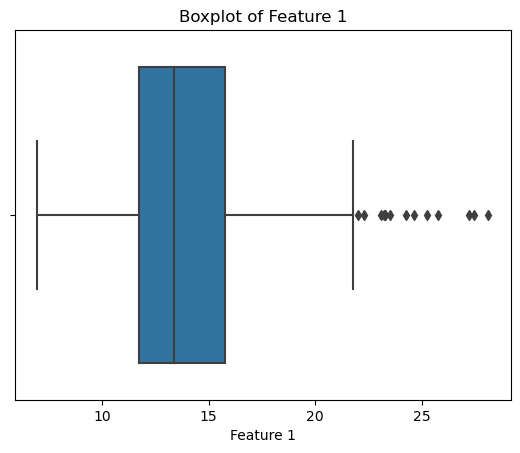

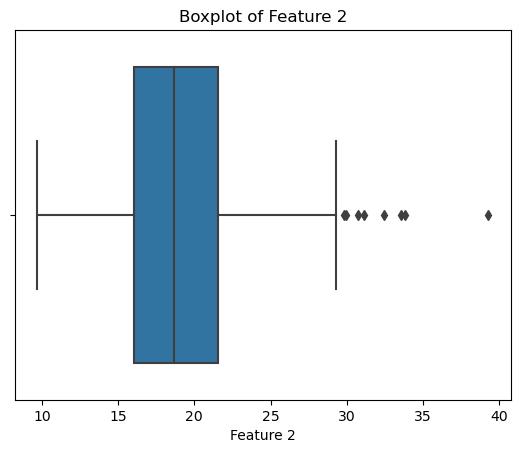

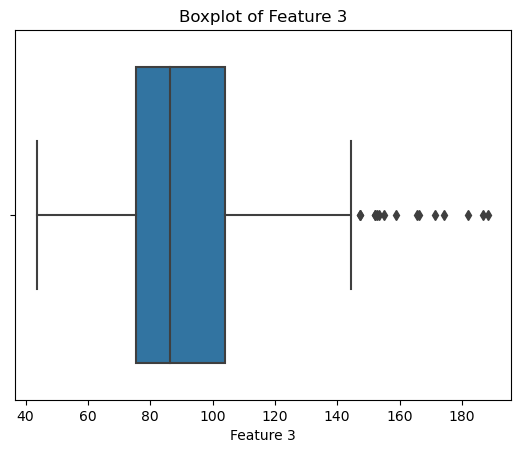

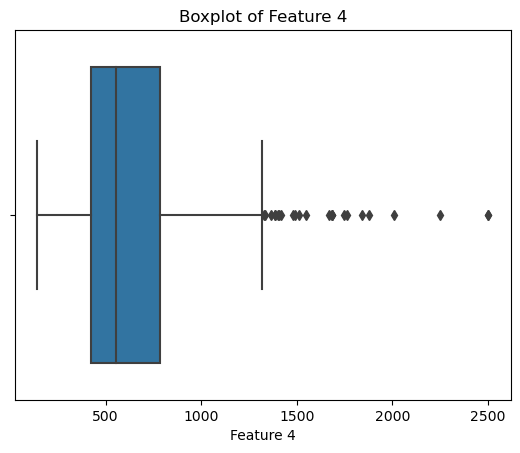

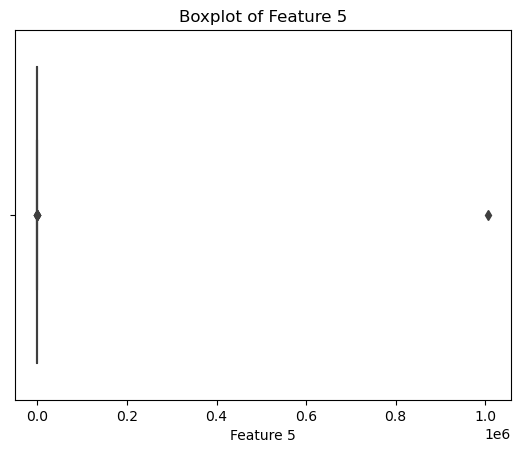

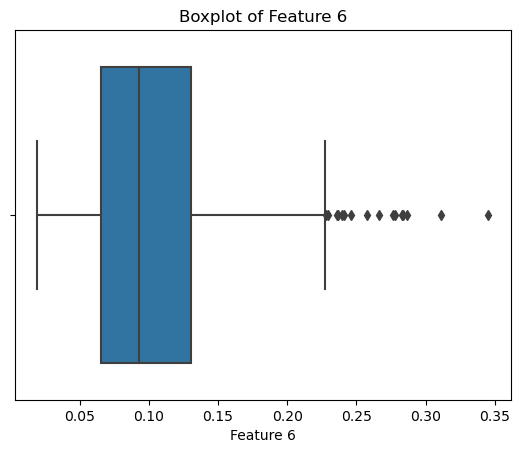

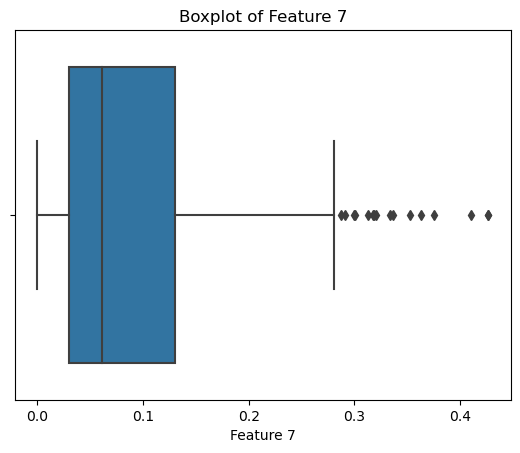

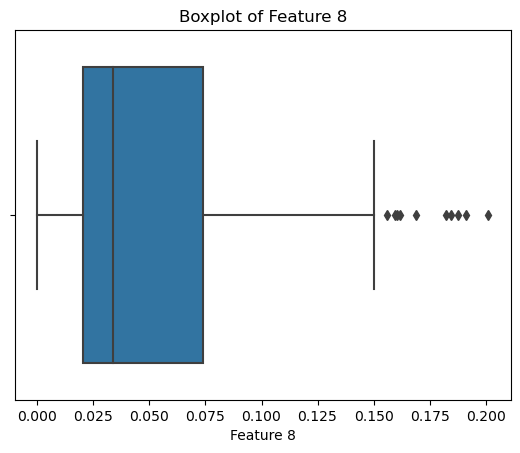

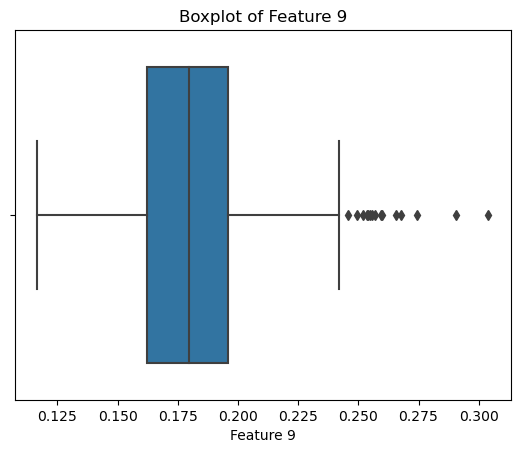

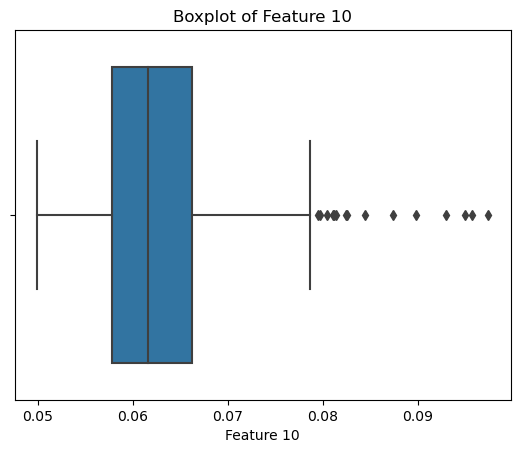

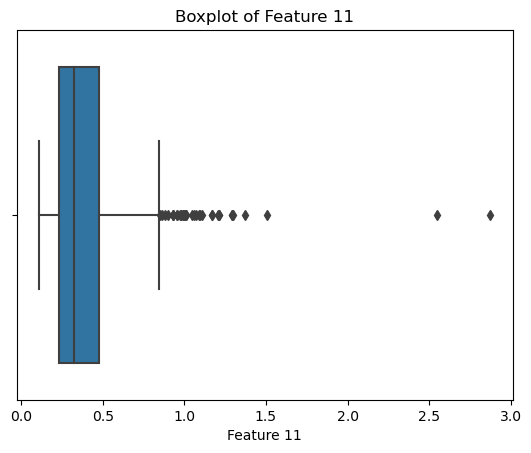

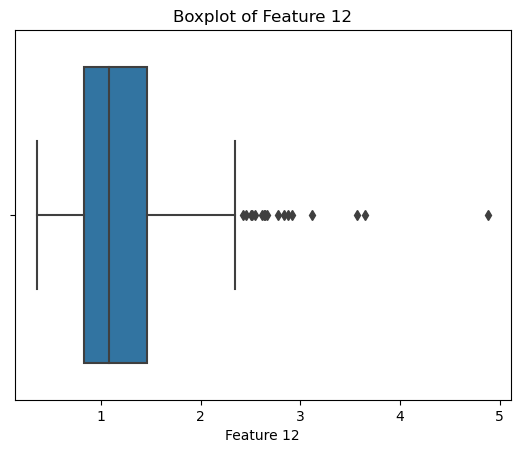

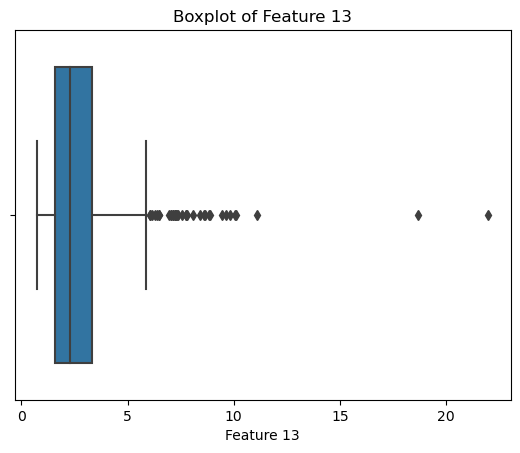

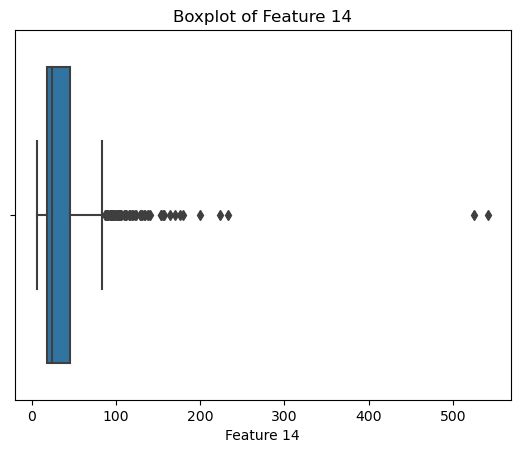

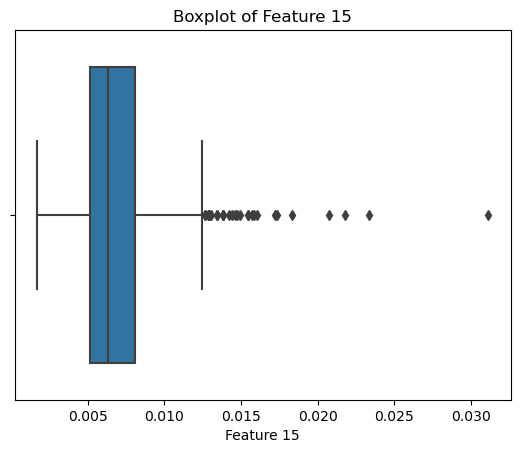

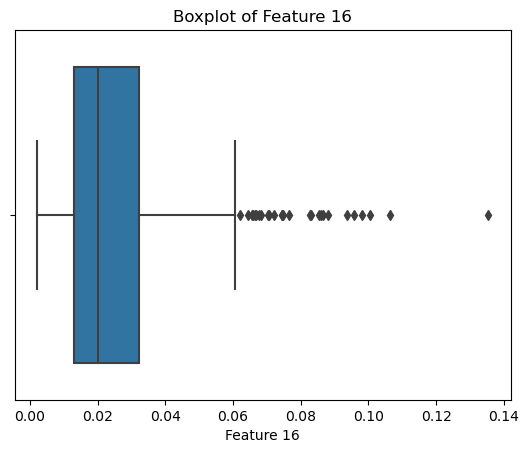

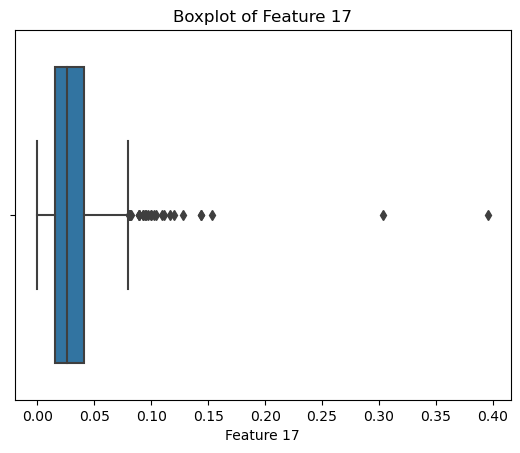

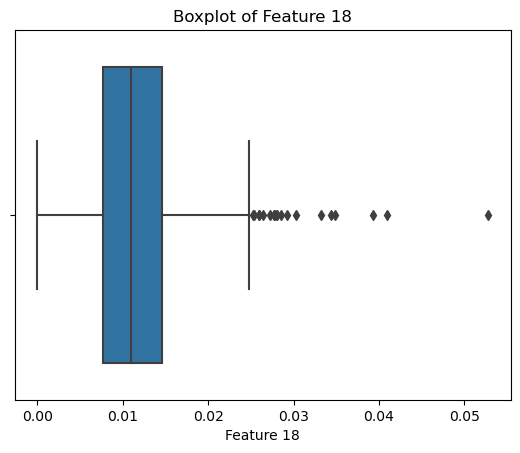

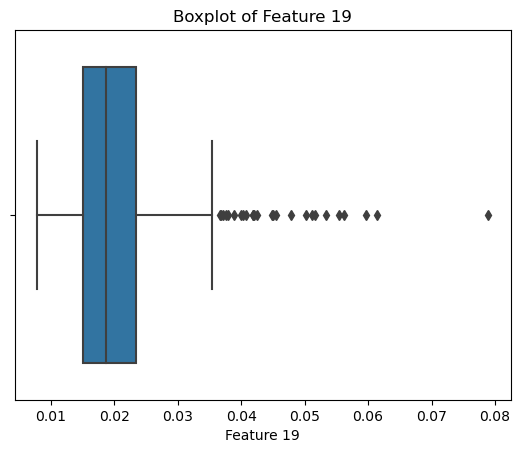

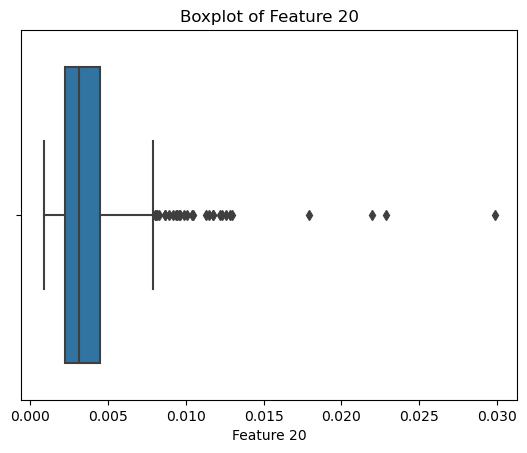

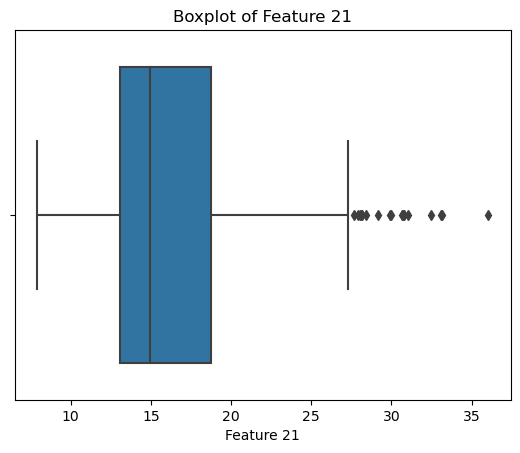

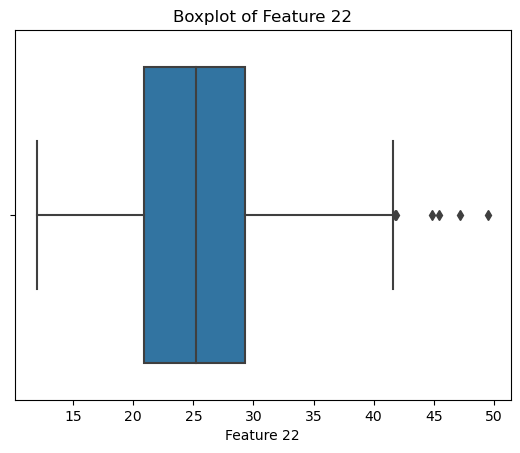

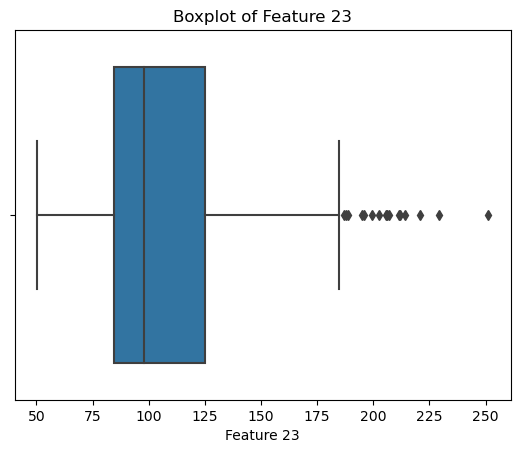

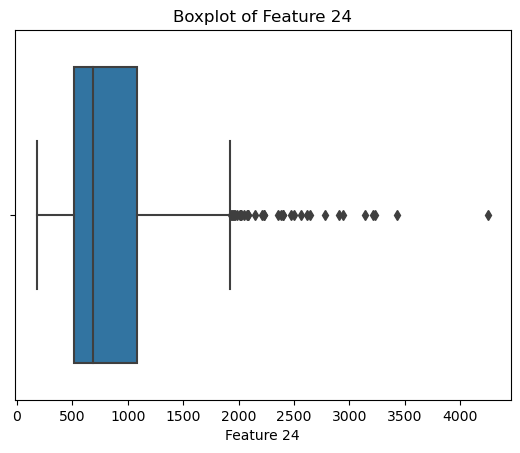

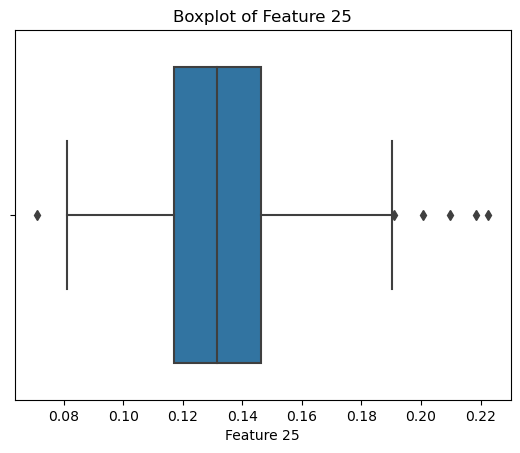

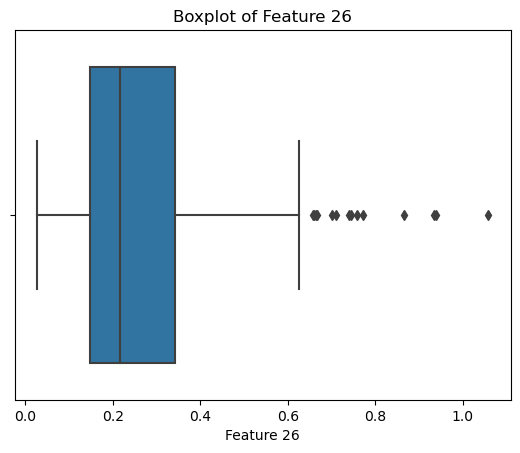

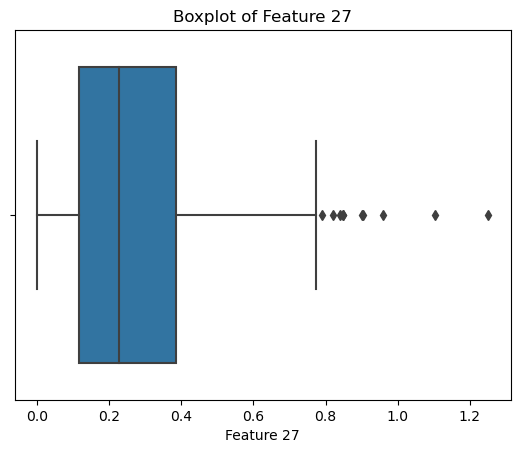

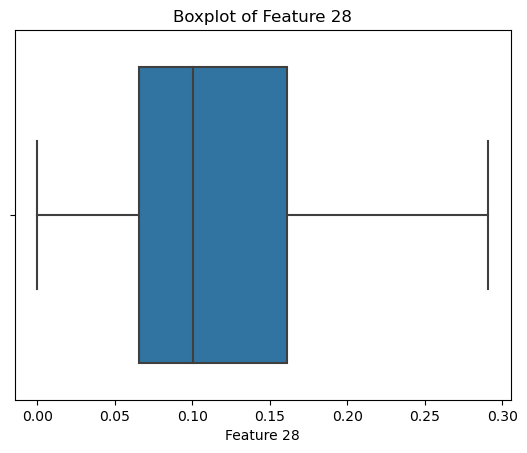

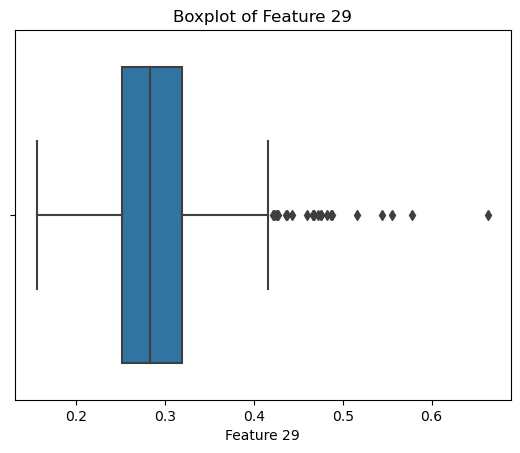

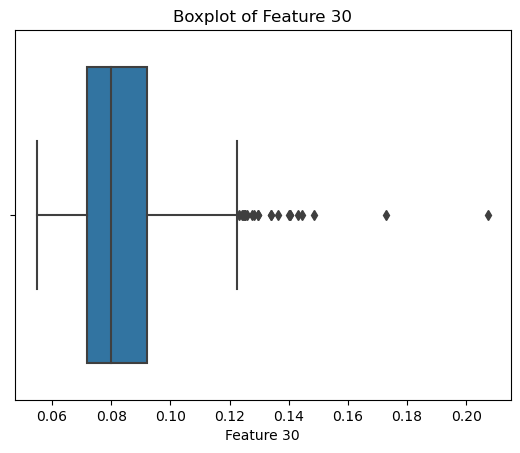

In [142]:
for i in range(1,31):
    sns.boxplot(x=df[f'Feature {i}'])
    plt.title('Boxplot of Feature {}'.format(i))
    plt.show()

We can see in these boxplots that some of the features need some cleaning, as they are extreme outliers that will negatively impact the accuracy of our analysis, these extreme outliers include the following that are a couple times or many times the value of the mean:

Feature 2 > 37

Feature 5 > 1e6

Feature 11 > 2.4

Feature 12 > 4.5

Feature 13 > 15

Feature 14 > 500

Feature 15 > 0.03

Feature 17 > 0.28

Feature 18 > 0.05

Feature 19 > 0.07

Feature 20 > 0.015

Feature 24 > 4000

Feature 29 > 0.6

Feature 30 > 0.16


Now lets work on removing these

In [143]:
df[df['Feature 2'] > 37]

,ID,Diagnosis,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
238,88330202,M,17.46,39.28,113.4,920.6,0.09812,0.1298,0.1417,0.08811,...,22.51,44.87,141.2,1408.0,0.1365,0.3735,0.3241,0.2066,0.2853,0.08496


In [144]:
df[df['Feature 5'] > 10000]

,ID,Diagnosis,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
249,884948,M,20.94,23.56,138.9,1364.0,1007000.0,0.1606,0.2712,0.131,...,25.58,27.0,165.3,2010.0,0.1211,0.3172,0.6991,0.2105,0.3126,0.07849


In [145]:
df[df['Feature 11'] > 2.4]

,ID,Diagnosis,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
211,8810703,M,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
460,911296202,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


In [146]:
df[df['Feature 12'] > 4.5]

,ID,Diagnosis,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
191,875099,B,9.72,18.22,60.73,288.1,0.0695,0.02344,0.0,0.0,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0,0.0,0.1909,0.06559


In [147]:
df[df['Feature 13'] > 15]

,ID,Diagnosis,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
211,8810703,M,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
460,911296202,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


In [148]:
df[df['Feature 14'] > 500]

,ID,Diagnosis,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
211,8810703,M,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
460,911296202,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


In [149]:
df[df['Feature 15'] > 0.03]

,ID,Diagnosis,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
212,881094802,M,17.42,25.56,114.5,948.0,0.1006,0.1146,0.1682,0.06597,...,18.07,28.07,120.4,1021.0,0.1243,0.1793,0.2803,0.1099,0.1603,0.06818


In [150]:
df[df['Feature 17'] > 0.28]

,ID,Diagnosis,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
67,859471,B,9.029,17.33,58.79,250.5,0.1066,0.1413,0.3130,0.04375,...,10.31,22.65,65.50,324.7,0.1482,0.4365,1.2520,0.1750,0.4228,0.1175
151,8710441,B,9.731,15.34,63.78,300.2,0.1072,0.1599,0.4108,0.07857,...,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.1571,0.3108,0.1259


In [151]:
df[df['Feature 18'] > 0.05]

,ID,Diagnosis,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
151,8710441,B,9.731,15.34,63.78,300.2,0.1072,0.1599,0.4108,0.07857,...,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.1571,0.3108,0.1259


In [152]:
df[df['Feature 19'] > 0.07]

,ID,Diagnosis,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
77,8610862,M,20.18,23.97,143.7,1245.0,0.1286,0.3454,0.3754,0.1604,...,23.37,31.72,170.3,1623.0,0.1639,0.6164,0.7681,0.2508,0.544,0.09964


In [153]:
df[df['Feature 20'] > 0.015]

,ID,Diagnosis,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
70,859711,B,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,...,9.733,15.67,62.56,284.4,0.12070,0.2436,0.1434,0.04786,0.2254,0.10840
151,8710441,B,9.731,15.34,63.78,300.2,0.10720,0.1599,0.41080,0.07857,...,11.020,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.15710,0.3108,0.12590
175,872608,B,9.904,18.06,64.60,302.4,0.09699,0.1294,0.13070,0.03716,...,11.260,24.39,73.07,390.2,0.13010,0.2950,0.3486,0.09910,0.2614,0.11620
289,89143602,B,14.410,19.73,96.03,651.0,0.08757,0.1676,0.13620,0.06602,...,15.770,22.13,101.70,767.3,0.09983,0.2472,0.2220,0.10210,0.2272,0.08799


In [154]:
df[df['Feature 24'] > 4000]

,ID,Diagnosis,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
460,911296202,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


In [155]:
df[df['Feature 29'] > 0.6]

,ID,Diagnosis,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
2,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173


In [156]:
df[df['Feature 30'] > 0.16]

,ID,Diagnosis,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
2,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
8,84501001,M,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.2075


In [157]:
df_spare = df.drop([238,249,211,460,191,212,67,151,77,70,175,289,2,8])

In [158]:
df_spare

,ID,Diagnosis,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
0,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
1,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
4,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,...,15.47,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440
5,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,...,22.88,27.66,153.20,1606.0,0.1442,0.25760,0.37840,0.19320,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,922577,B,10.320,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
546,922840,B,10.260,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.024380,...,10.83,22.04,71.08,357.4,0.1461,0.22460,0.17830,0.08333,0.2691,0.09479
547,923169,B,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,...,10.93,25.59,69.10,364.2,0.1199,0.09546,0.09350,0.03846,0.2552,0.07920
548,923465,B,10.820,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.008160,...,13.03,31.45,83.90,505.6,0.1204,0.16330,0.06194,0.03264,0.3059,0.07626


C. Using the Seaborn library’s heatmap() function, generate a plot showing the
correlations between the numerical data in the data set. Show the commands used
to generate the plot and include the plot in your output.

In [159]:
corr = df_spare.corr()

/local_scratch/24614920/ipykernel_27037/484272153.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_spare.corr()


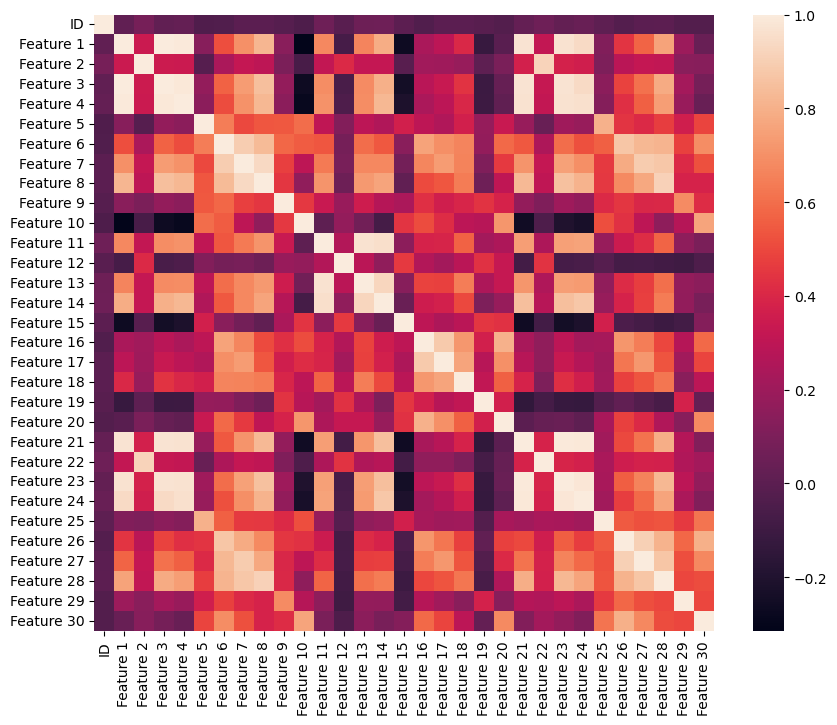

In [160]:
plt.figure(figsize=(10,8))
sns.heatmap(corr)

plt.show()

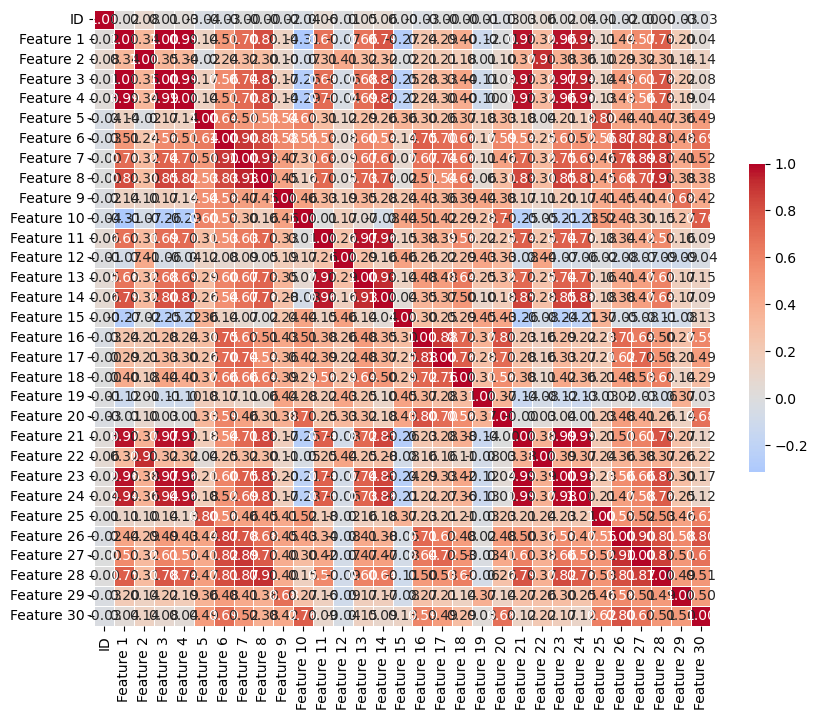

In [161]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show() #more detailed plot

D. Label encode the column containing the diagnosis of the tumor cells with 0 or 1 (0
for benign and 1 for malignant).

In [162]:
df['Diagnosis'] = df['Diagnosis'].map({'B': 0, 'M': 1})

In [165]:
df

,ID,Diagnosis,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
0,842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
1,84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
2,84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
3,84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
4,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,...,15.47,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,922577,0,10.320,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
546,922840,0,10.260,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.024380,...,10.83,22.04,71.08,357.4,0.1461,0.22460,0.17830,0.08333,0.2691,0.09479
547,923169,0,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,...,10.93,25.59,69.10,364.2,0.1199,0.09546,0.09350,0.03846,0.2552,0.07920
548,923465,0,10.820,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.008160,...,13.03,31.45,83.90,505.6,0.1204,0.16330,0.06194,0.03264,0.3059,0.07626


In [167]:
df_spare

,ID,Diagnosis,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
0,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
1,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
4,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,...,15.47,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440
5,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,...,22.88,27.66,153.20,1606.0,0.1442,0.25760,0.37840,0.19320,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,922577,B,10.320,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
546,922840,B,10.260,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.024380,...,10.83,22.04,71.08,357.4,0.1461,0.22460,0.17830,0.08333,0.2691,0.09479
547,923169,B,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,...,10.93,25.59,69.10,364.2,0.1199,0.09546,0.09350,0.03846,0.2552,0.07920
548,923465,B,10.820,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.008160,...,13.03,31.45,83.90,505.6,0.1204,0.16330,0.06194,0.03264,0.3059,0.07626


E. Partition the data set so that a random sample of 80% of the data will be used for
training and 20% will be used for testing a machine learning model. 

In [168]:
from sklearn.model_selection import train_test_split

X = df.drop(['Diagnosis','ID'], axis=1)  # Features 
y = df['Diagnosis']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# random_state is set to some number for reproducibility


F. Perform a standardization of the columns of data in the data set.

In [230]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df.drop(['ID','Diagnosis'], axis=1))

df_scaled = pd.DataFrame(df_scaled, columns=df.columns.drop(['ID','Diagnosis']))

df_scaled


,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
0,1.840343,-0.310881,1.697354,1.916615,-0.042679,-0.493187,-0.019331,0.554263,-0.012211,-0.867460,...,1.809080,-0.337037,1.542836,1.887845,-0.392689,-0.439945,-0.147477,1.095673,-0.263805,0.276588
1,1.588445,0.528290,1.576849,1.565000,-0.042679,1.061470,1.389774,2.061537,0.931463,-0.400582,...,1.513552,0.014996,1.353713,1.453292,0.509358,1.100234,0.877996,1.976083,1.139731,0.196422
2,-0.778825,0.318497,-0.601393,-0.770239,-0.042678,3.433825,1.950865,1.468862,2.870218,4.865861,...,-0.288754,0.176068,-0.256234,-0.554624,3.373139,3.960474,2.039510,2.200047,6.059426,4.951811
3,1.760194,-1.137995,1.788772,1.833714,-0.042679,0.542996,1.397425,1.445364,-0.023226,-0.563708,...,1.299190,-1.456238,1.344707,1.217543,0.202837,-0.320823,0.630468,0.732697,-0.891574,-0.404821
4,-0.483989,-0.810043,-0.394040,-0.510101,-0.042678,1.254702,0.884791,0.834152,0.997557,1.869121,...,-0.172208,-0.280579,-0.120246,-0.248677,2.028826,1.750229,1.295944,0.911868,1.744732,2.246216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,-1.093697,-0.653301,-1.111256,-0.945189,-0.042679,-1.042272,-0.998435,-1.134339,0.255837,-0.116518,...,-1.050468,-0.609365,-1.089276,-0.876228,-0.186882,-1.075569,-1.118729,-1.409480,-0.376023,-0.560142
546,-1.110872,-0.597839,-1.088817,-0.956910,-0.042679,-0.454541,-0.571751,-0.641270,-0.537290,0.604894,...,-1.137878,-0.564530,-1.090477,-0.924610,0.583799,-0.193931,-0.458360,-0.490147,-0.359759,0.597808
547,-1.276037,0.067710,-1.288275,-1.057249,-0.042679,-1.035385,-0.829470,-1.026770,-0.864088,-0.068705,...,-1.117066,0.024959,-1.149915,-0.912646,-0.563465,-1.029991,-0.874835,-1.183199,-0.585821,-0.270098
548,-0.950574,1.242067,-0.962494,-0.840276,-0.042679,-0.734632,-0.930084,-1.064758,0.589978,0.062077,...,-0.680017,0.998033,-0.705626,-0.663878,-0.541571,-0.590791,-1.029835,-1.273094,0.238736,-0.433770


I will apply principal component analysis (PCA) to reduce the number of all features in the
data set from 30 to a smaller number. I will also justify the number of components selected.
library.

answer: 
    
   To find the number of components, I will graph a cumulative explained variance plot and take the number of components at which the cumulative explained variance is around 0.95 or 95%. This will help minimize the number of components while not taking away too much from the total variance.
    
    
   According to the graph, this occurs at around 12 components, so that is what I will be using.

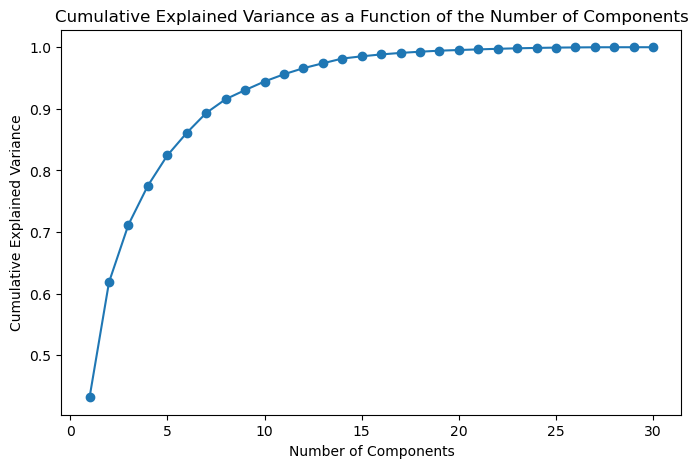

In [231]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled)

explained_var_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_var_ratio.cumsum()

# Plotting the cumulative variance to determine the number of components
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.show()

In [232]:
pca = PCA(n_components=12)

df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(12)])

df_pca['Diagnosis'] = df['Diagnosis'].values

df_pca['ID'] = df['ID'].values

df_pca


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,Diagnosis,ID
0,2.587434,-3.601326,-0.376325,-1.241658,0.176109,-0.231313,-0.179083,-0.129854,0.185328,-0.747952,-0.964888,0.790003,1,842517
1,5.706247,-1.039783,-0.467526,-0.851099,-0.487709,0.323322,-0.438519,-0.616032,-0.110898,0.035642,-0.548160,-0.551433,1,84300903
2,6.556957,9.997883,-3.552778,0.194074,-4.203423,1.080593,-0.695179,1.383369,-1.391978,-1.454793,0.976422,-0.912563,1,84348301
3,3.963972,-1.849952,1.678046,-2.860082,0.326787,-1.220688,0.359283,-1.241968,-0.137130,-0.238869,-0.363197,0.595826,1,84358402
4,1.985469,3.582114,-2.857792,-0.837771,-1.004940,-0.683544,0.382726,0.416360,0.107473,-0.088778,0.536401,0.108046,1,843786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,-4.311050,-0.009418,-0.123576,-0.266163,-0.645609,-0.249375,0.327210,0.239175,0.193812,0.502262,-0.586515,0.355696,0,922577
546,-2.704734,2.320246,-0.105277,-0.416950,0.347170,-0.772776,0.440303,-0.226475,-0.631589,-0.506948,-0.058294,-0.023189,0,922840
547,-3.779907,0.518490,0.910258,0.692394,0.228941,-0.085353,0.163032,0.449346,-0.268377,0.365838,0.194498,0.109323,0,923169
548,-2.409412,0.354669,1.280796,2.500620,-1.269512,0.186802,0.075004,0.959030,-0.040272,0.368420,-0.342227,-0.012104,0,923465


H. Using the new features generated from PCA, construct a logistic regression model
with Scikit-Learn to determine if the tumor cells are malignant or benign.

In [233]:
from sklearn.model_selection import train_test_split

X_pca = df_pca.drop(['Diagnosis','ID'], axis=1)  # Features 
y_pca = df_pca['Diagnosis']  # Target variable

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_pca, y_pca, test_size=0.2, random_state=43)

# random_state again is set to some different number for reproducibility


In [234]:
X_train_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
457,-3.028087,-2.071467,0.053364,2.056696,0.522780,-0.139979,0.248794,-0.156660,-0.056691,0.424227,-0.717079,-0.266595
488,-0.494312,-2.281269,-2.044199,0.195377,-1.127207,2.334826,-1.323309,0.321888,-1.146209,-0.348800,-0.641757,0.574692
35,1.291417,0.938873,-1.735180,0.794419,0.294593,0.604445,-0.276315,-0.094562,-0.619392,0.379166,0.293245,0.241627
375,2.008091,6.814293,0.786530,-1.076432,3.835246,1.063594,-0.508196,-0.093593,0.900360,1.206910,-1.306294,0.457233
24,6.900736,2.013076,0.153503,-1.996796,-3.002665,-0.140341,-0.054814,0.528268,1.889120,1.113624,-2.136325,-0.464392
...,...,...,...,...,...,...,...,...,...,...,...,...
16,4.234094,1.259233,-2.275159,0.421792,-1.034864,-1.102728,0.586782,0.262718,0.686907,0.037458,-0.246790,0.026626
58,-4.324247,2.137832,-1.006920,-1.716050,-1.400628,-1.510799,1.014744,-0.048707,-0.880242,0.291605,0.416924,0.634970
277,-3.325414,-2.598148,0.041192,0.275126,0.512721,0.421758,-0.210814,0.234141,0.369960,0.165557,0.114981,0.342963
255,6.607983,-1.480107,0.204645,1.526152,0.811515,-0.260269,-0.160489,1.276332,-0.259639,-0.544192,-0.730308,-1.108929


In [235]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [236]:
logreg = LogisticRegression()
logreg.fit(X_train_PCA, y_train_PCA)

LogisticRegression()

I. Perform k-fold cross validation (with 5 splits) with a logistic regression model using
the training set. What is the average and standard deviation of the accuracy of the
models? Comment on the accuracy and precision of the models.

Answer:

   It appears that the model has an extremely high accuracy of 97%, which suggests that all the steps thus far including data manipulation, outlier handling, and other modifications to features have been done correctly and fruitfully. Additionally, the low standard deviation signifies that the model's performance is consistent across different folds. There isn't much variation in accuracy from one subset of data to another, which suggests the model should generalize well.
   
   
   In terms of precision, here it should measure the proportion of positive identifications (in this case, malignant tumors) that were actually correct. A high precision model makes very few false positive predictions.
   
   
   In this model, there are 3 malignant tumors that have been labeled benign, this is relatively accurate however for this model specifically this is extremely destructive due to the significance of false negatives. Because they lead a patient who needs treatment into not receiving it which results in the malignant tumor spreading. 
   
   
   It is not realistic for the precision to always be 100% however this model still is not 100% reliable and should not be used with full trust especially when it results in a benign tumor. Since all predictions of malignance were correct.

In [237]:
from sklearn.model_selection import cross_val_score

In [238]:
scores = cross_val_score(logreg, X_train_PCA, y_train_PCA, cv=5)

In [239]:
mean_accuracy = scores.mean()
std_dev_accuracy = scores.std()

print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation of Accuracy: {std_dev_accuracy:.2f}")

Mean Accuracy: 0.97
Standard Deviation of Accuracy: 0.02


In [240]:
scores

array([1.        , 0.97727273, 0.95454545, 0.95454545, 0.98863636])

J. Perform a final validation test on the test set. What is the accuracy? Generate a
confusion matrix for the results.

In [241]:
y_pred = logreg.predict(X_test_PCA)

In [242]:
accuracy = accuracy_score(y_test_PCA,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


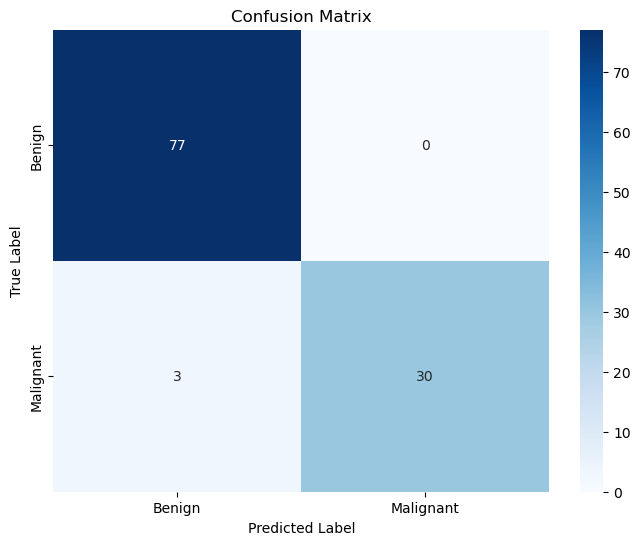

In [243]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test_PCA, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [244]:
# top left : True Negative
# top right: False Positive
# bottom left: False Negative
# bottom right: True Positive

K. A new patient has been admitted to the hospital, and images of tumors have been
taken and analyzed. This new data is presented in
/public/bmort/python/new_patient.pkl, which is a pickle file
containing a list that has 31 elements. The first element represents the ID of the
patient (removed), and the other 30 elements represent the numerical
measurements of the tumor cell features in the same order of features as the
original data set. Based on the developed logistic regression model, are the cells of
this patient benign or malignant?

Answer:

    The model has predicted that the tumor is benign.


In [245]:
import pickle

with open('/public/bmort/python/new_patient.pkl', 'rb') as file:
    patient = pickle.load(file)
    
patient_features = pd.DataFrame([patient[1:]])
patient_features.columns = ['Feature 1', 'Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8','Feature 9','Feature 10','Feature 11','Feature 12','Feature 13','Feature 14','Feature 15','Feature 16','Feature 17','Feature 18','Feature 19','Feature 20','Feature 21','Feature 22','Feature 23','Feature 24','Feature 25','Feature 26','Feature 27','Feature 28','Feature 29','Feature 30']
patient_features

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30
0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0,0.0,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0,0.0,0.2871,0.07039


In [246]:
patient_features_scaled = scaler.transform(patient_features)
patient_features_scaled

array([[-1.826492  ,  1.32164358, -1.83387378, -1.35655034, -0.04267998,
        -1.16318585, -1.12748635, -1.27780791, -0.8383844 , -0.56230195,
        -0.06677329,  0.43466502, -0.15201599, -0.46348818,  0.06014199,
        -1.15410177, -1.04894892, -1.93191293,  0.75343063, -0.37640848,
        -1.4238324 ,  0.81869496, -1.44830958, -1.08083746, -1.87449885,
        -1.2308165 , -1.33403862, -1.77724452, -0.06701726, -0.76055646]])

In [248]:
patient_features_reduced = pca.transform(patient_features_scaled)
patient_features_reduced 

/software/anaconda3/2023.07-2/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-5.05834785, -0.27651245,  1.18852839,  2.37275371, -0.69348176,
         0.70438563, -0.1072332 ,  1.50752842, -0.89783311,  0.23668163,
         0.01649923, -0.22730707]])

In [254]:
newpatient_df = pd.DataFrame(patient_features_reduced)

In [255]:
newpatient_df.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12']

In [256]:
newpatient_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-5.058348,-0.276512,1.188528,2.372754,-0.693482,0.704386,-0.107233,1.507528,-0.897833,0.236682,0.016499,-0.227307


In [266]:
prediction = logreg.predict(newpatient_df)

In [271]:
if prediction[0] == 0:
    print("The model predicts the patient's tumor cells are benign.")
else:
    print("The model predicts the patient's tumor cells are malignant.")

The model predicts the patient's tumor cells are benign.
